## About Project

The goal of the project is to develop a deep learning model capable of recognizing handwritten digits from images

## About Dataset

The project utilizes the MNIST dataset, a collection of 28x28 pixel grayscale images of handwritten digits. The dataset includes 60,000 training images and 10,000 testing images, each labeled with the corresponding digit.



# Main steps

- Import the necessary libraries.
- Load the dataset.
- Conduct data exploration to gain insights into its structure and characteristics.
- Prepare the data for modeling by performing necessary preprocessing steps.
- Build three distinct models with varying structure.
- Compare and analyze the outcomes of the three model trials for performance evaluation.

## Import Libraries

In [ ]:
# import required libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Load Dataset

In [ ]:
# Load handwritten dataset
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

## Exploratory Data

In [ ]:
# Get shape of "X_train"
print(f"Get shape of 'X_train' :{X_train.shape}")

Get shape of 'X_train' :(60000, 28, 28)


- Train data contains 60,000 images and  size of each image is (28,28)

In [ ]:
# Get shape of "y_train"
print(f"Get shape of 'y_train' :{y_train.shape}")

Get shape of 'y_train' :(60000,)


In [ ]:
# Get shape of "X_test"
print(f"Get shape of 'X_test' :{X_test.shape}")

Get shape of 'X_test' :(10000, 28, 28)


- Test data contains 10,000 images and  size of each image is (28,28)

In [ ]:
# Get shape of "y_test"
print(f"Get shape of 'y_test' :{y_test.shape}")

Get shape of 'y_test' :(10000,)


In [ ]:
print(f"The number of images in Train data : {X_train.shape[0]} images ")

The number of images in Train data : 60000 images 


In [ ]:
print(f"The number of images in Test data : {X_test.shape[0]} images ")

The number of images in Test data : 10000 images 


In [ ]:
print(f"The size of each image  in Train and test data is: {X_test.shape[1:]}")

The size of each image  in Train and test data is: (28, 28)


- size of each image is (28,28)

In [ ]:
# The percentage of test data relative to the train data.
print(len(X_test)/len(X_train))

0.16666666666666666


In [ ]:
# Show the first image in train data
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

- Each image represent in form of matrix , the values in matrix in range (0 , 255)
- 0 means black index
- 255  means white index

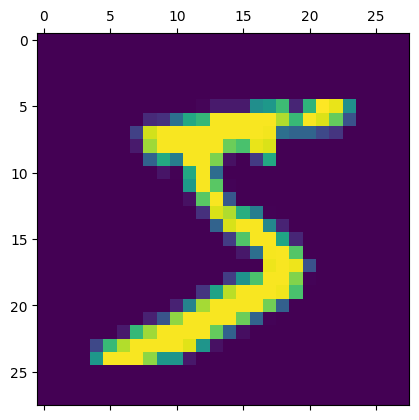

In [ ]:
# Plot the first image
plt.matshow(X_train[0])

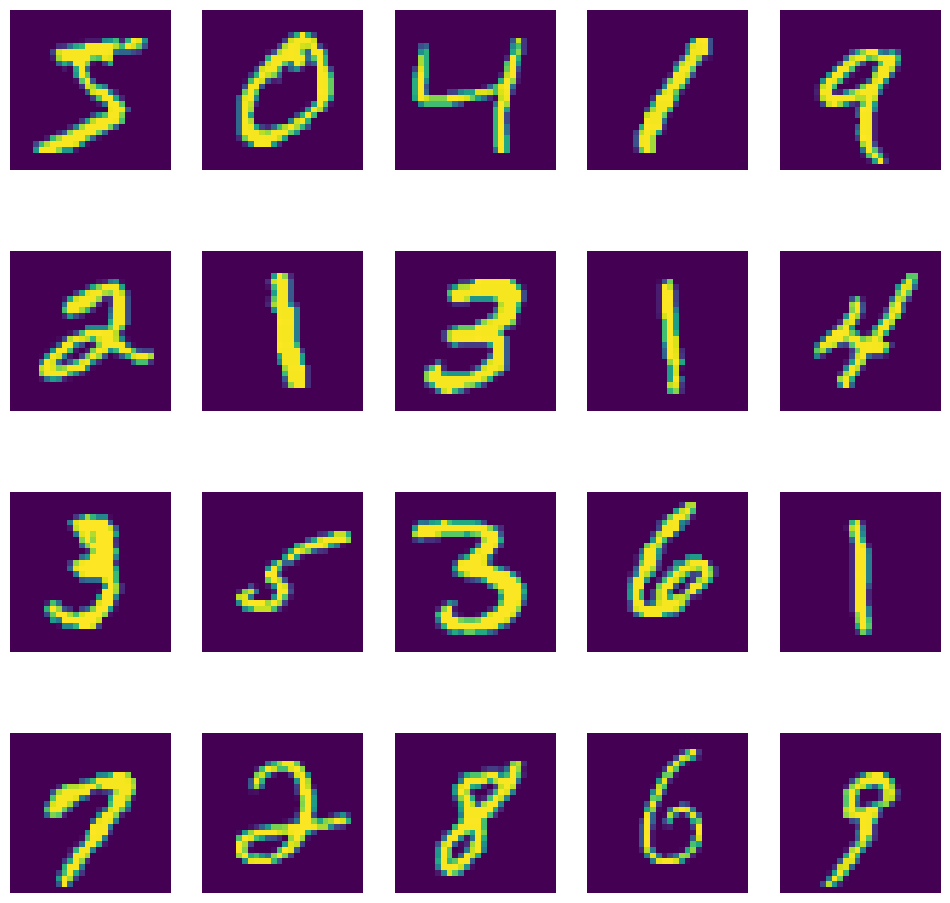

In [ ]:
# Print the first 20 values in X_train
import matplotlib.pyplot as plt
rows = 4
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(12, 12))

for i in range(rows):
    for j in range(cols):
        index = i * cols + j
        if index < len(X_train):
            axes[i, j].imshow(X_train[index])
            axes[i, j].axis('off')

plt.show()


In [ ]:
# Print also the first 20 values in y_train
print(y_train[0:20])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


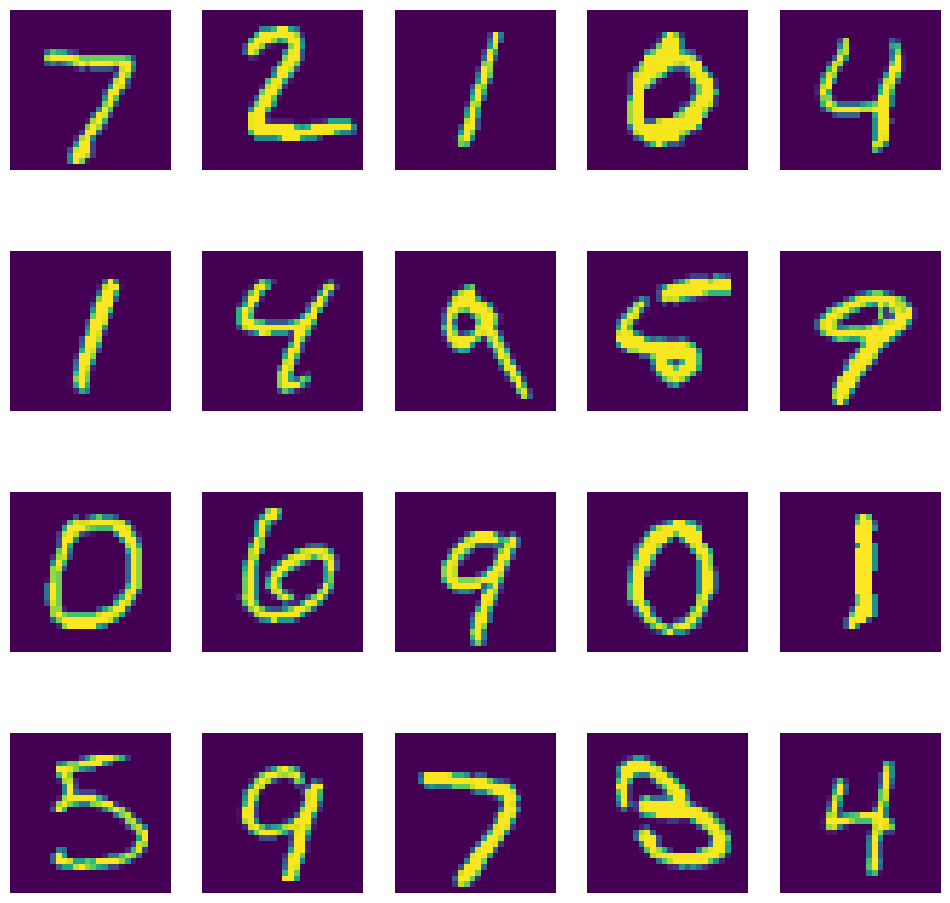

In [ ]:
# Print the first 20 values in x_test
import matplotlib.pyplot as plt
rows = 4
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(12, 12))

for i in range(rows):
    for j in range(cols):
        index = i * cols + j
        if index < len(X_test):
            axes[i, j].imshow(X_test[index])
            axes[i, j].axis('off')

plt.show()

In [ ]:
# Print also the first 20 values in y_test
print(y_test[0:20])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [ ]:
# Scaling the data to be between 0 and 1 to help the model converge faster.
X_train=X_train/255
X_test=X_test/255

The first thing in need to flatten the image  :

In [ ]:
# Shape of X_train
X_train.shape

(60000, 28, 28)

In [ ]:
# Make flatten for X_train
X_train_flatten =X_train.reshape(len(X_train),784)

In [ ]:
# Shape of X_train after flatten
X_train_flatten.shape

(60000, 784)

In [ ]:
# Make flatten for X_test
X_test_flatten =X_test.reshape(len(X_test),784)

In [ ]:
# Shape of X_test after flatten
X_test_flatten.shape

(10000, 784)

In [ ]:
# Print the first flatten image in train
print(X_train_flatten[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [ ]:
# Print the first flatten image in test
print(X_test_flatten[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

- The images now converted from two dimension into one dimension
- The data is now ready for modeling.








## Model

### Trial 1

In [ ]:
# Start building simple network
# Using Sequential model
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model

In [ ]:
# Compile the model to determine optimizer,loss and metric
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
# Start fit the model with 30 epochs
model.fit(X_train_flatten,y_train , epochs=30)

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4681 - accuracy: 0.8777
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3040 - accuracy: 0.9153
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9208
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2734 - accuracy: 0.9236
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9251
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2616 - accuracy: 0.9272
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2585 - accuracy: 0.9283
Epoch 8/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2553 - accuracy: 0.9288
Epoch 9/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2526 - accuracy: 0.9305
Epoch 10/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.250

In [ ]:
# Make an evalution on Test dataset
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2734 - accuracy: 0.9283


[0.2733830213546753, 0.9283000230789185]

- The model is generalized well on unseen data

In [ ]:
# Test the prediction
preddiction=model.predict(X_test_flatten)

313/313 [==============================] - 1s 1ms/step


In [ ]:
# Test the first 20 values in prediction
l_1=[]
for i in range (len(preddiction)):

    if i <=99:
        l_1.append(np.argmax(preddiction[i]))
print(l_1)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 2, 7, 4, 2, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9]


In [ ]:
l_2=y_test[0:100]

In [ ]:
print(f"The length of true values is {len(l_1)} and the length of predicted values is {len(l_2)}")

The length of true values is 100 and the length of predicted values is 100


In [ ]:
# Print values in each list
print(f"The values of l_1 list {l_1}\n\nthe values of l_2 list is {l_2}")

The values of l_1 list [7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 2, 7, 4, 2, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9]

the values of l_2 list is [7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9]


In [ ]:
# Convert l_2 to list
l_2=list(l_2)

In [ ]:
# Print type of l_2
print(type(l_2))

<class 'list'>


In [ ]:
similar_count = 0
for value1, value2 in zip(l_1, l_2):
    if value1 == value2:
        similar_count += 1

print(f'Number of similar values in two list: {similar_count}')

Number of similar values in two list: 96


Based on the output, the model successfully predicted 96 values correctly and made only four incorrect prediction. The overall accuracy of the model is 96%, with a 4% error rate on first 100 image


In [ ]:
# Confusion Matrix
y_predicted_labels = [np.argmax(i) for i in preddiction]
confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    0,    2,    1,    6,    7,    3,    1,    0],
       [   0, 1110,    3,    1,    0,    1,    5,    2,   13,    0],
       [   6,    9,  930,   17,    7,    3,   12,   10,   33,    5],
       [   3,    0,   14,  928,    1,   21,    2,   10,   20,   11],
       [   1,    2,    5,    3,  904,    0,   11,    5,    9,   42],
       [  10,    3,    2,   34,    9,  773,   15,    8,   31,    7],
       [  13,    3,    6,    2,    7,   11,  913,    1,    2,    0],
       [   1,    5,   23,    4,    4,    1,    0,  950,    2,   38],
       [   8,    7,    5,   20,    9,   22,    7,    9,  872,   15],
       [   9,    7,    1,   10,   16,    5,    0,   12,    6,  943]],
      dtype=int32)>

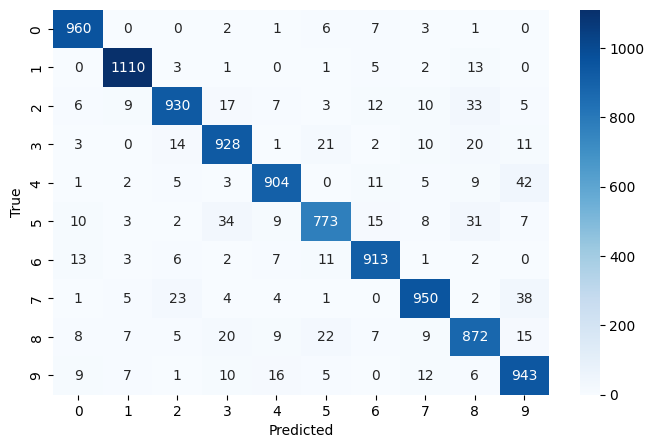

In [ ]:
import seaborn as sn
plt.figure(figsize=(8, 5))
sn.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Trial 2

Change the structure of model by adding two hidden layer

In [ ]:
# Using Sequential model
model_2 = keras.Sequential([
    keras.layers.Dense(50, input_shape=(784,), activation='relu') ,
    keras.layers.Dense(100, activation='relu') ,
    keras.layers.Dense(10, activation='sigmoid')
])
model_2

In [ ]:
# Compile the model to determine optimizer,loss and metric
model_2.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
# Start fit the model with 30 epochs
model_2.fit(X_train_flatten,y_train , epochs=30)

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2776 - accuracy: 0.9186
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1323 - accuracy: 0.9595
Epoch 3/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0965 - accuracy: 0.9704
Epoch 4/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0793 - accuracy: 0.9755
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0649 - accuracy: 0.9793
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0554 - accuracy: 0.9823
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0469 - accuracy: 0.9845
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0409 - accuracy: 0.9866
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0357 - accuracy: 0.9880
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.031

In [ ]:
# Make an evalution on Test dataset
model_2.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1623 - accuracy: 0.9739


[0.16230344772338867, 0.9739000201225281]

- The model has generalized well, and the results have improved compared to the first trial.

In [ ]:
# Test the prediction
preddiction_2=model_2.predict(X_test_flatten)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# Confusion Matrix
y_predicted_labels_2 = [np.argmax(i) for i in preddiction_2]
confusion_matrix_2= tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels_2)
confusion_matrix_2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    5,    1,    0,    0,    0,    0,    2,    2],
       [   0, 1125,    1,    3,    0,    0,    0,    2,    4,    0],
       [   2,    2, 1011,    1,    1,    0,    2,    5,    8,    0],
       [   0,    0,    9,  984,    0,    1,    0,    8,    5,    3],
       [   2,    0,    5,    0,  953,    0,    2,    3,    0,   17],
       [   3,    1,    0,   49,    3,  823,    4,    3,    2,    4],
       [   7,    3,    3,    2,    4,    5,  931,    0,    3,    0],
       [   0,    4,   18,    1,    2,    0,    0,  995,    1,    7],
       [   8,    1,    5,    2,    6,    3,    0,    5,  940,    4],
       [   4,    2,    0,   10,    5,    1,    1,    5,    7,  974]],
      dtype=int32)>

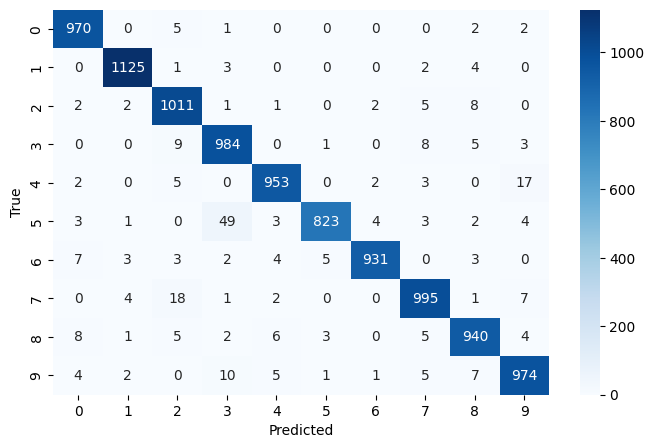

In [ ]:
import seaborn as sn
plt.figure(figsize=(8, 5))
sn.heatmap(confusion_matrix_2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

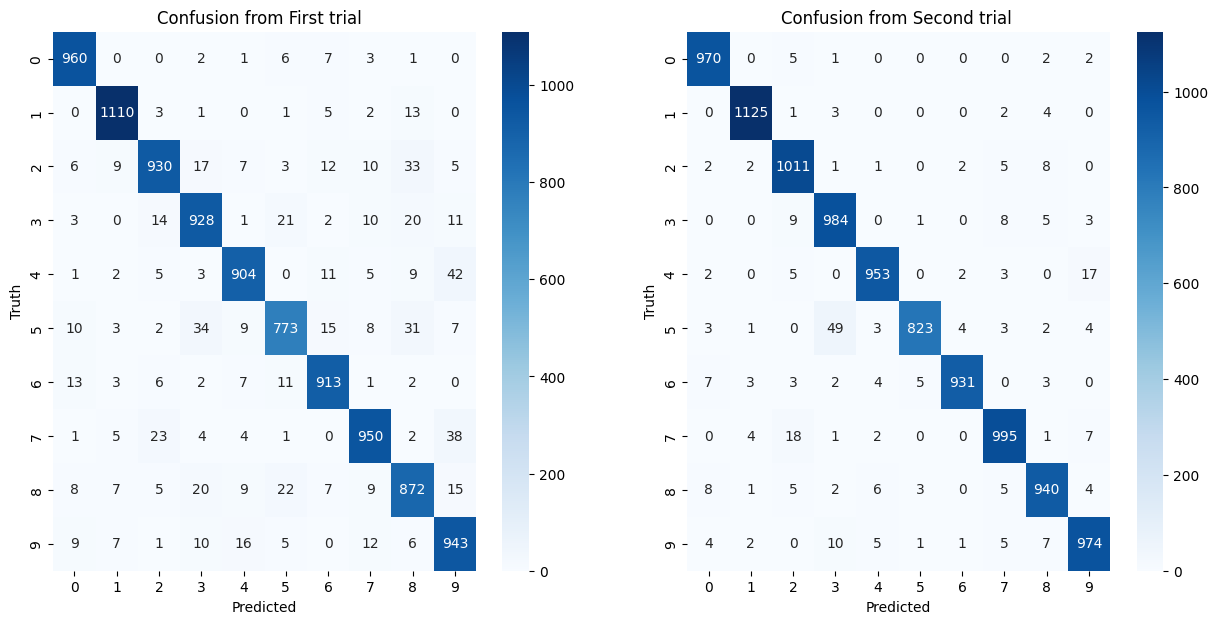

In [ ]:
# Draw two confusion matrix together to show the improvement
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# First heatmap
sn.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion from First trial  ')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Truth')

# Second heatmap
sn.heatmap(confusion_matrix_2, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion from Second trial ')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Truth')

plt.show()

### Trial 3

Make hyperparameter tuning

In [ ]:
"""
1- Define the combination of hyperparameters to get accuracy an loss to each combination then choose model that have best hyperparameters
2- Define function that take hyperparameter, the function called "evaluation_parameters"
3- The model type is Sequential
4- The size of input shape is 784
5- The output layer contain 10 units because there are 10 classes

"""

def evaluation_parameters(hidden_size = 100, optimizers = "Adam",
                        learning_rate = 0.001, regularization = 0.001):
    model = keras.Sequential()
    model.add(keras.Input(shape=(784,)))
    model.add(keras.layers.Dense(hidden_size, activation = "relu"))
    model.add(keras.layers.Dense(hidden_size, activation = "relu"))
    model.add(keras.layers.Dense(10, activation = "sigmoid"))


    model.compile(optimizer = optimizers, loss = "SparseCategoricalCrossentropy", metrics = ["accuracy"])
    EarlyStop = keras.callbacks.EarlyStopping(patience = 10)

    # train the model with these hyperparameters
    model_fit = model.fit(X_train_flatten,y_train, epochs = 30, verbose = 0,
                        validation_data = (X_test_flatten, y_test), callbacks=[EarlyStop])


    # evalute the model
    val=model.evaluate(X_test_flatten, y_test);
    # capture the hyperparameter on this experiment
    h_par = { "hidden_size" : hidden_size ,"optimizers" : optimizers}


    fig, axes = plt.subplots(2,1, figsize = [16, 16])
    axes[0].plot(model_fit.history['accuracy'])
    try:
        axes[0].plot(model_fit.history['val_accuracy'])
        axes[0].legend(['Train', 'Val'])
    except:
        pass
    axes[0].set_title('{:s}'.format('accuracy'))
    axes[0].set_ylabel('{:s}'.format('accuracy'))
    axes[0].set_xlabel('Epoch')
    fig.subplots_adjust(hspace=0.5)
    axes[1].plot(model_fit.history['loss'])
    try:
        axes[1].plot(model_fit.history['val_loss'])
        axes[1].legend(['Train', 'Val'])
    except:
        pass
    axes[1].set_title('Model Loss')
    axes[1].set_ylabel('Loss')
    axes[1].set_xlabel('Epoch')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    return val,h_par

====>hidden_size = 192
==>optimizers = Adam
the hyperparameters are  hidden_size = 192  , optimizers = Adam 
313/313 [==============================] - 1s 2ms/step - loss: 0.1144 - accuracy: 0.9791
==>optimizers = RMSprop
the hyperparameters are  hidden_size = 192  , optimizers = RMSprop 
313/313 [==============================] - 1s 2ms/step - loss: 0.1430 - accuracy: 0.9801
====>hidden_size = 384
==>optimizers = Adam
the hyperparameters are  hidden_size = 384  , optimizers = Adam 
313/313 [==============================] - 1s 3ms/step - loss: 0.1142 - accuracy: 0.9801
==>optimizers = RMSprop
the hyperparameters are  hidden_size = 384  , optimizers = RMSprop 
313/313 [==============================] - 1s 3ms/step - loss: 0.1213 - accuracy: 0.9825


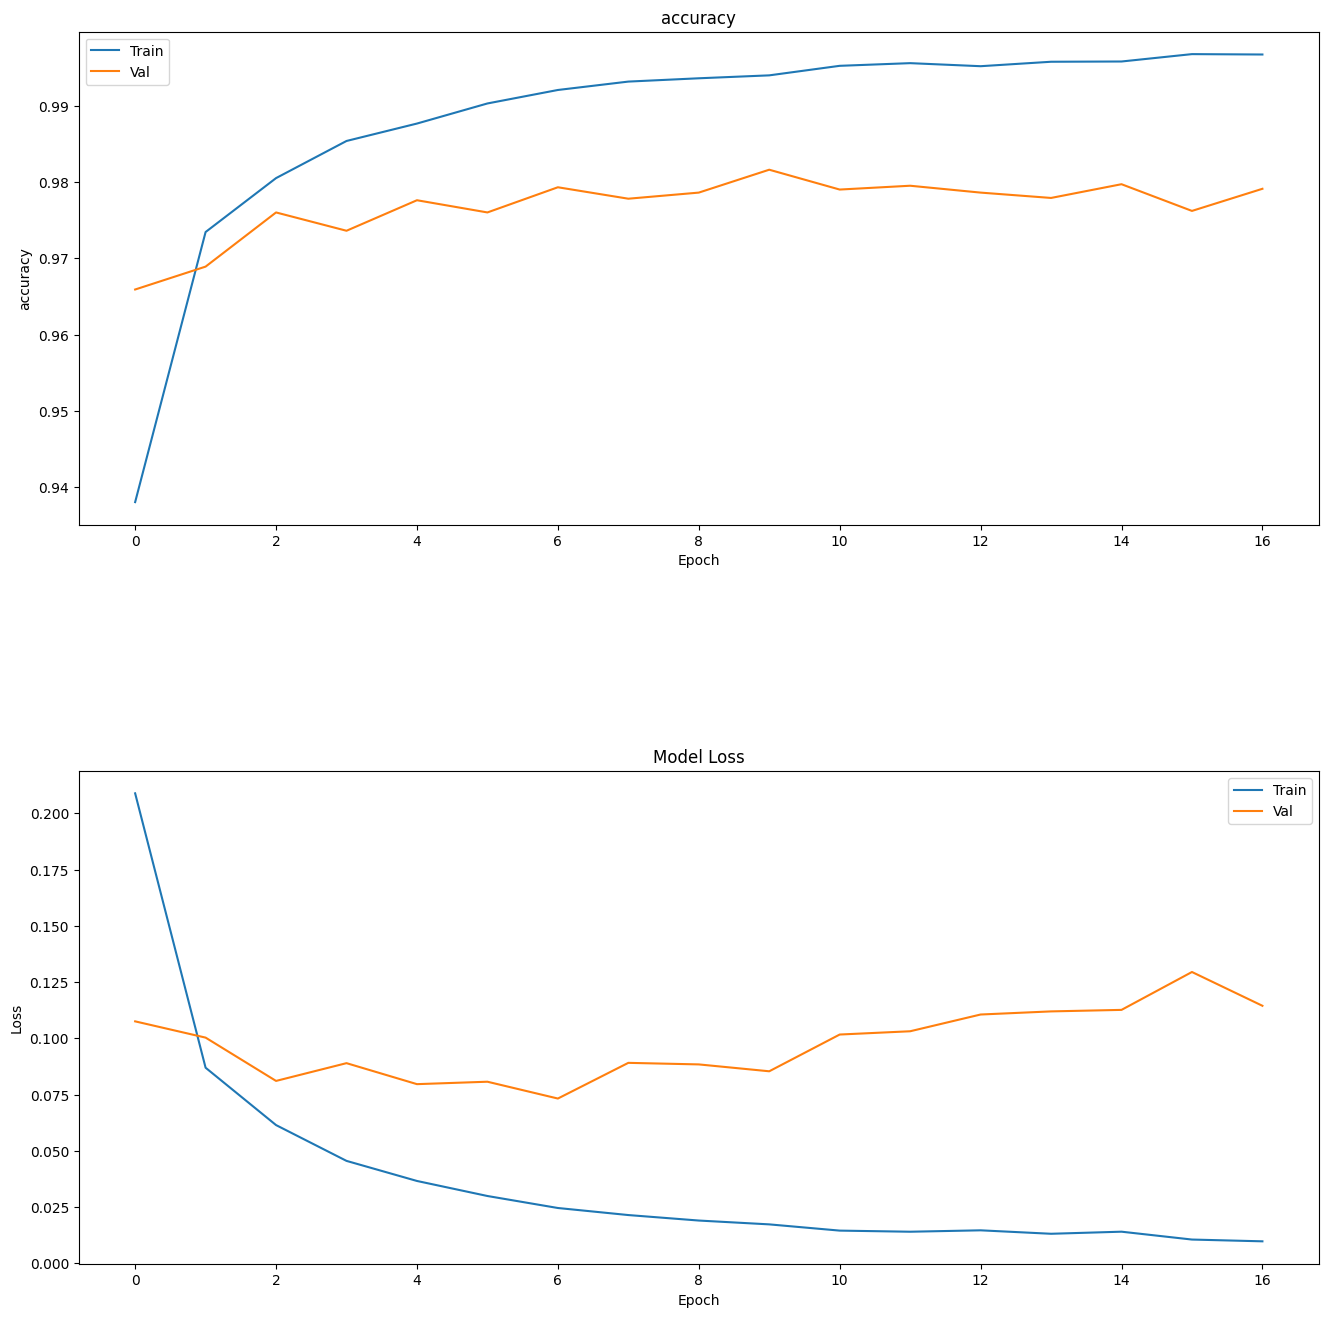

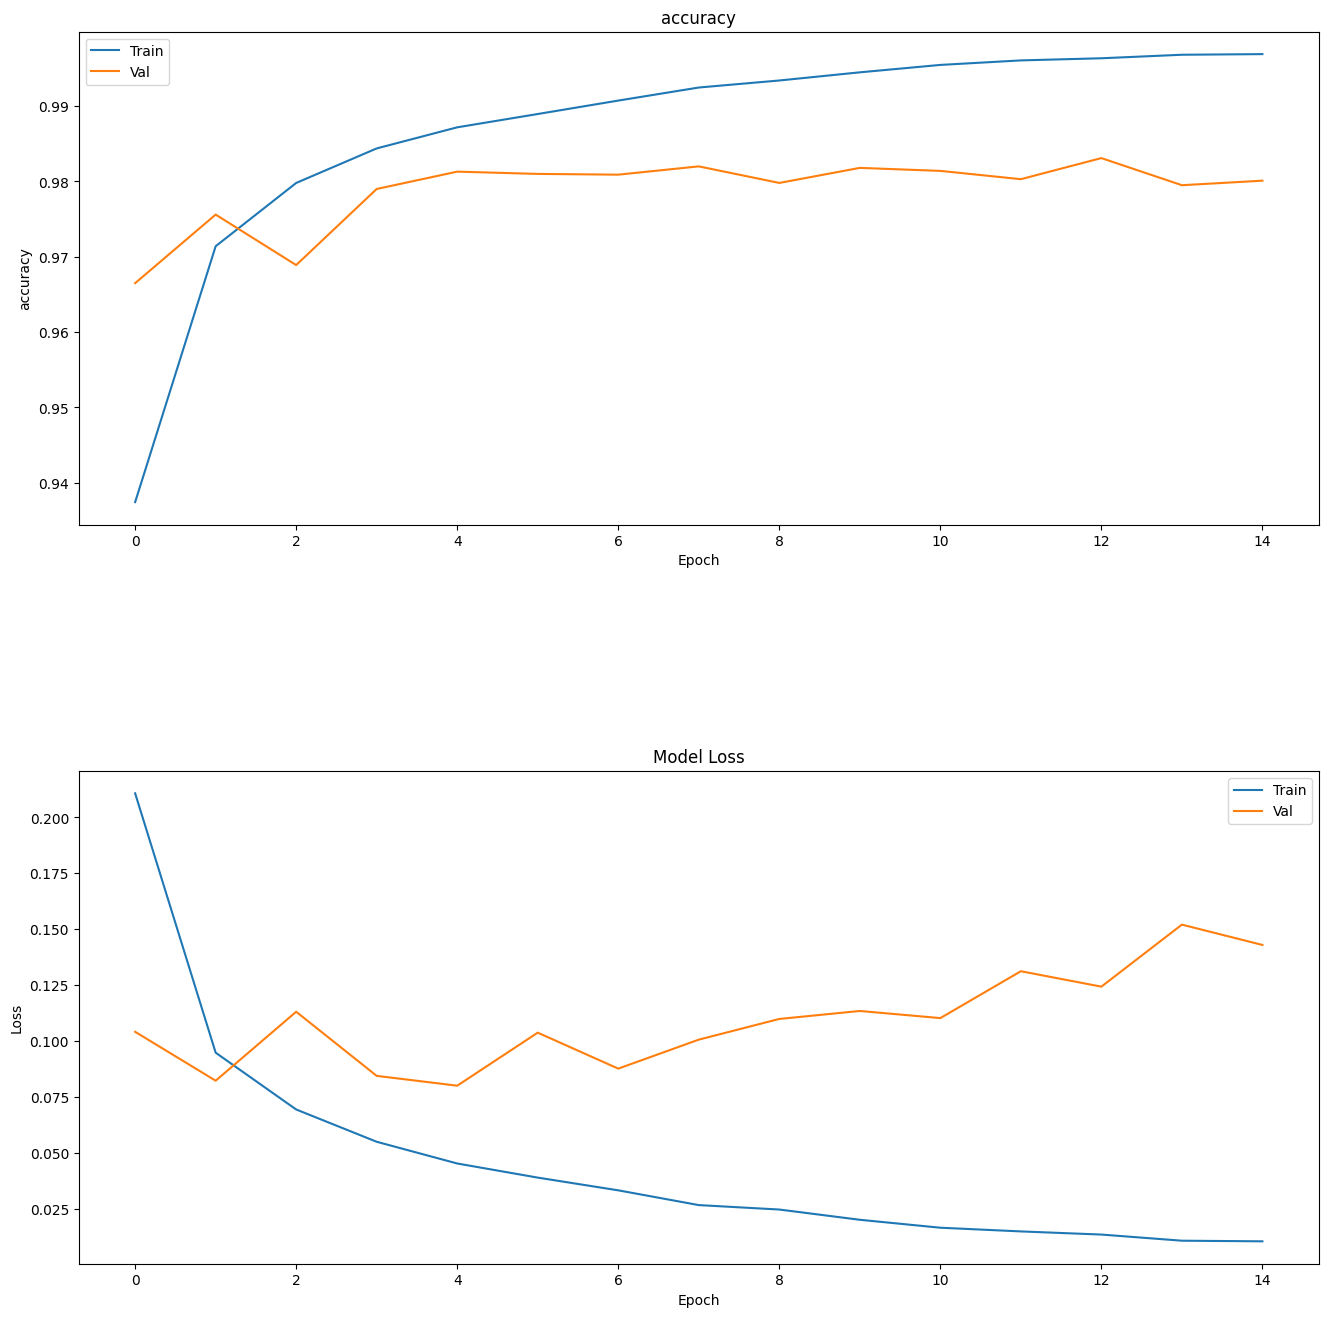

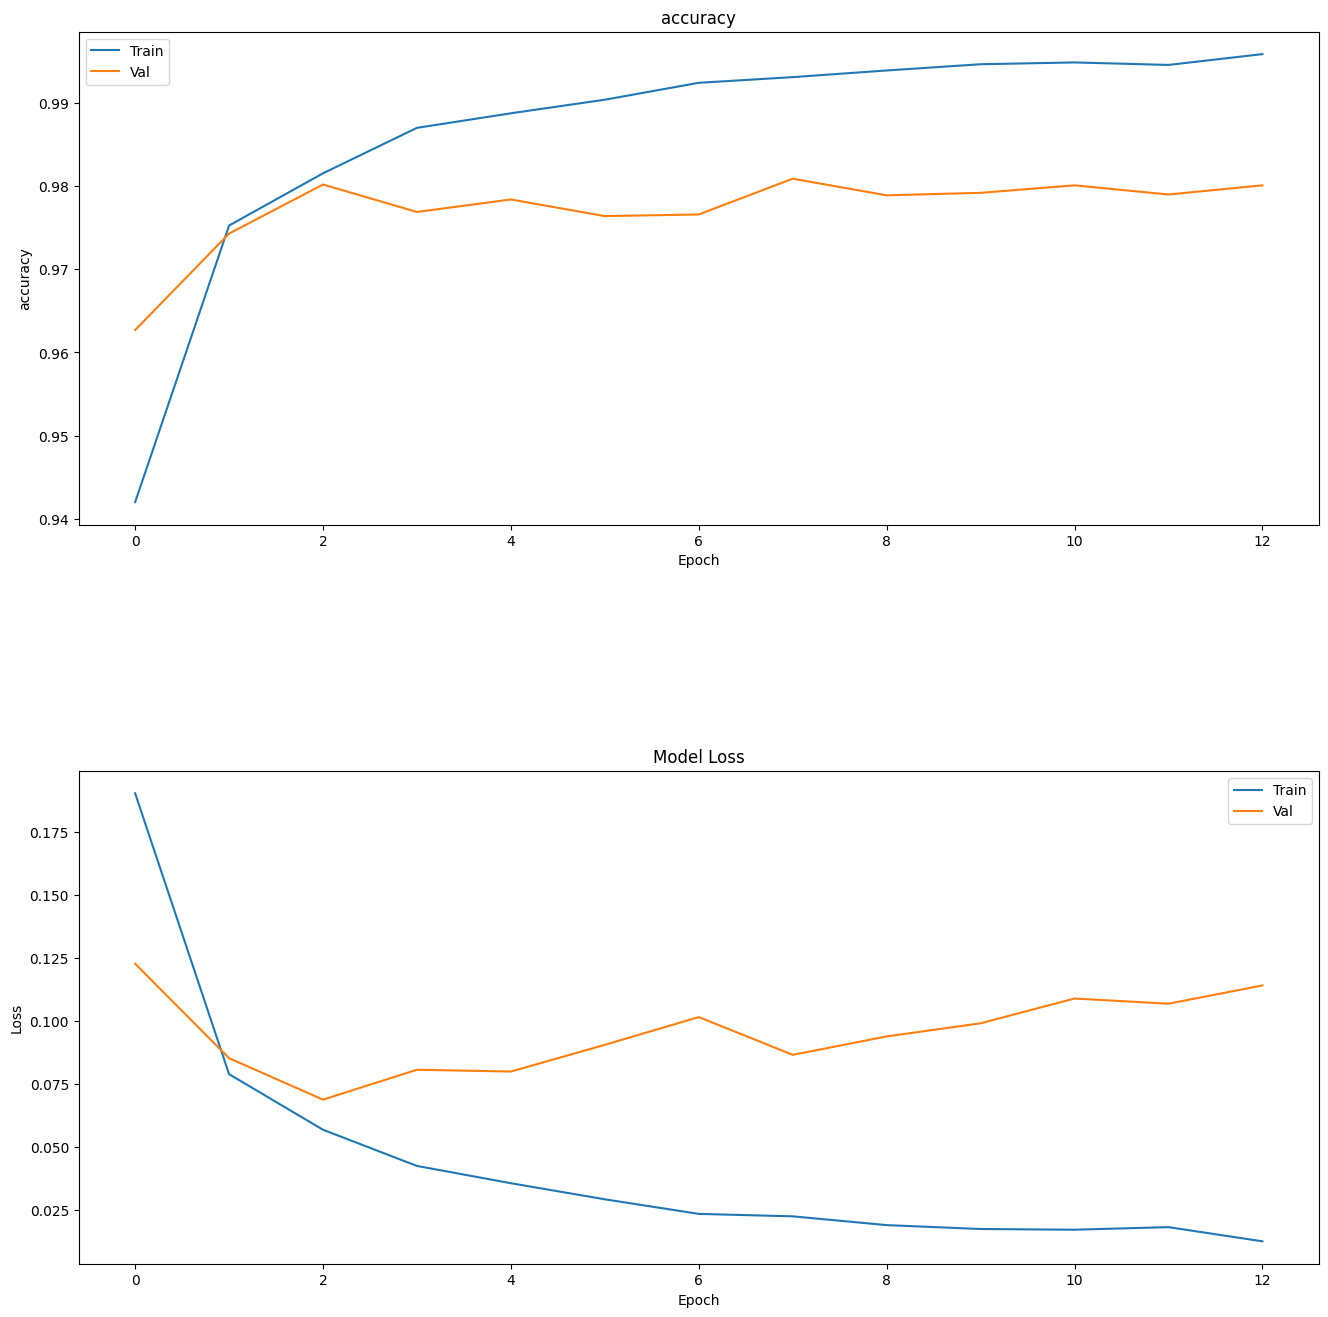

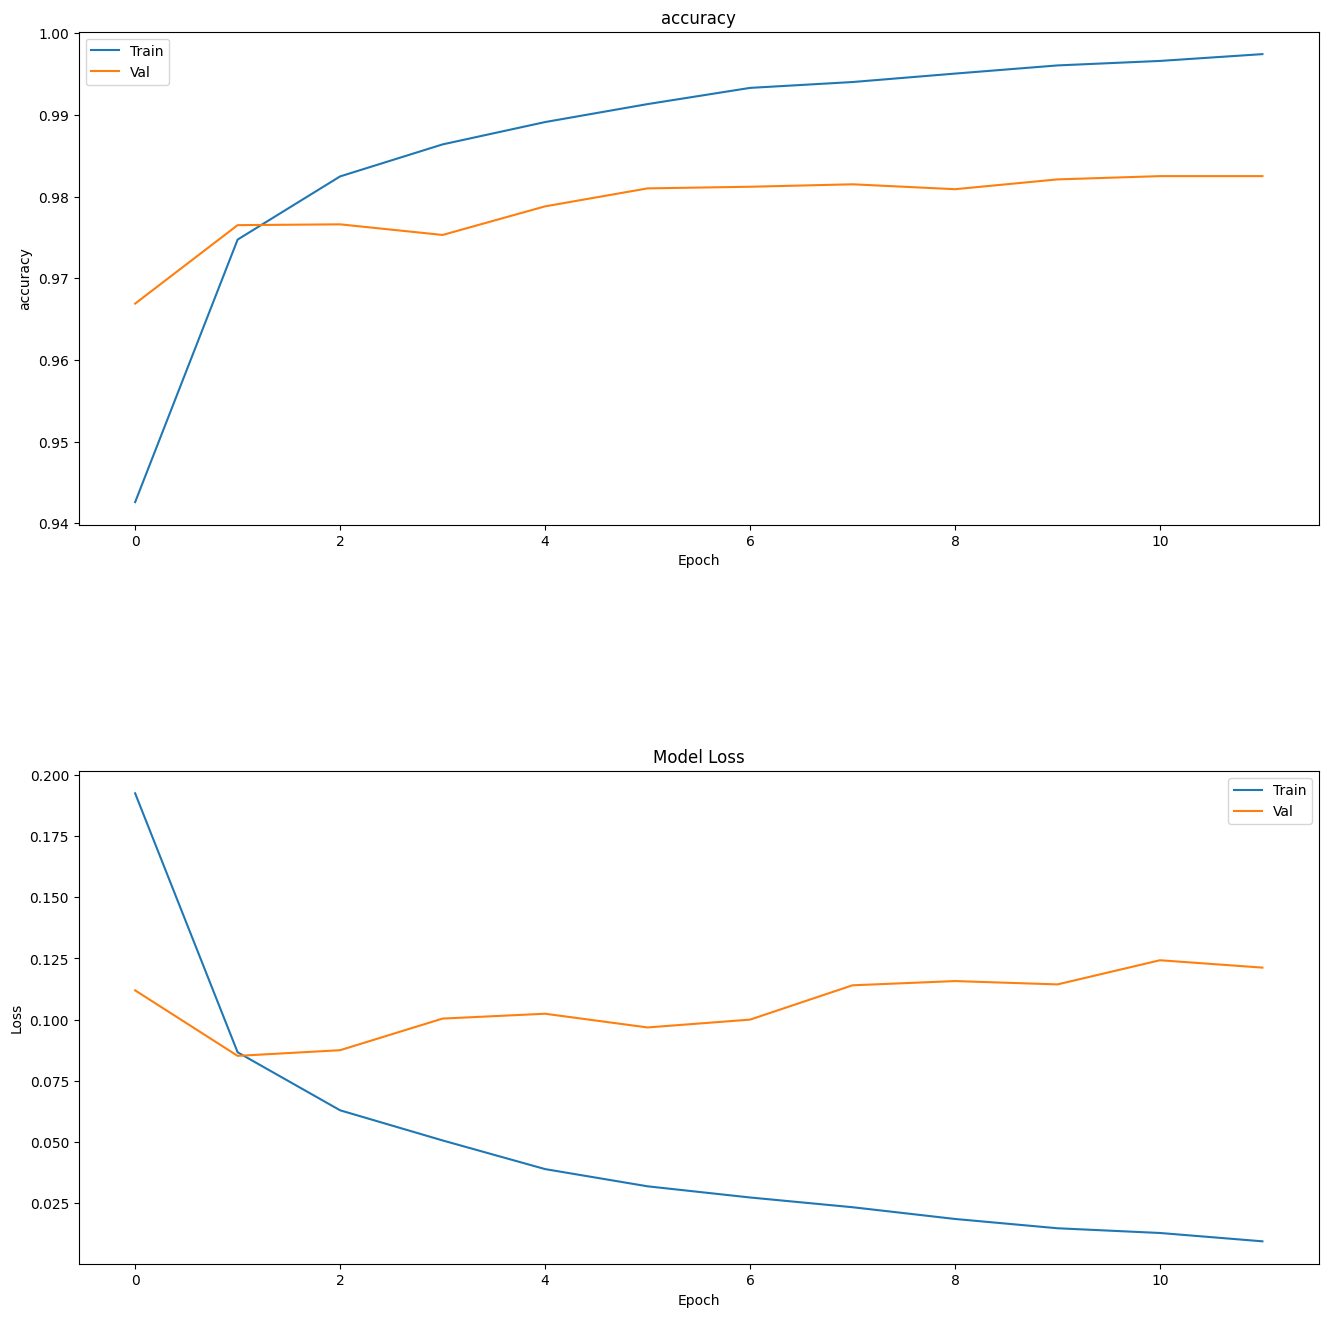

In [ ]:
# Make a combination from different hyperparameters
# Get validation accuracy and loss for each  combination
hyper=[]
our_data=[]
hidden_size=[192, 384]
optimizers = ["Adam","RMSprop"]

for i in hidden_size:
    print(f"====>hidden_size = {i}")
    for k in optimizers:
        print(f"==>optimizers = {k}")

        print(f"the hyperparameters are  hidden_size = {i}  , optimizers = {k} ")
        val,h_par=evaluation_parameters(hidden_size = i, optimizers = k)
        # This value store the  loss , accuracy , hyperparameter
        our_data.append([val[0],val[1],h_par])

In [ ]:
# Concatenate the accuracy and hyperparameter in one list
accuracy_hyperparameter=[]
for i in our_data:

    accuracy_hyperparameter.append([i[1],i[2]])

In [ ]:
# Split the accuracy and hyperparameters in two list
acc=[]
hyper=[]
max_acc=[]
for i,j in accuracy_hyperparameter:

    acc.append(i)
    hyper.append(j)
print(hyper)
print(acc)

[{'hidden_size': 192, 'optimizers': 'Adam'}, {'hidden_size': 192, 'optimizers': 'RMSprop'}, {'hidden_size': 384, 'optimizers': 'Adam'}, {'hidden_size': 384, 'optimizers': 'RMSprop'}]
[0.9790999889373779, 0.9800999760627747, 0.9800999760627747, 0.9825000166893005]


In [ ]:
# Get the maximum  accuracy
# Get the  index of max accuracy
# The index of max accuracy will be the index of best hyperparameter
max_acct=[]
acc_len=len(acc)
max_index=0
for index in range (acc_len):


      if acc[index]>acc[max_index]:

        max_index=index
        print(max_index)

print("the best hyperparameters are {}".format(hyper[max_index]))
print("the validation  accuracy is {} ".format(acc[max_index]))

1
3
the best hyperparameters are {'hidden_size': 384, 'optimizers': 'RMSprop'}
the validation  accuracy is 0.9825000166893005 


In [ ]:
# Build the model with the best hyperparameters
# Using Sequential model
model_3 = keras.Sequential([
    keras.layers.Dense(384, input_shape=(784,), activation='relu') ,
    keras.layers.Dense(384, activation='relu') ,
    keras.layers.Dense(10, activation='sigmoid')
])
model_3

In [ ]:
# Compile the model to determine optimizer,loss and metric
model_3.compile(optimizer='RMSprop' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
# Start fit the model with 20 epochs
model_3.fit(X_train_flatten,y_train , epochs=30)

Epoch 1/30
1875/1875 [==============================] - 13s 6ms/step - loss: 0.1935 - accuracy: 0.9412
Epoch 2/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0870 - accuracy: 0.9746
Epoch 3/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0631 - accuracy: 0.9821
Epoch 4/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0483 - accuracy: 0.9859
Epoch 5/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0394 - accuracy: 0.9888
Epoch 6/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0301 - accuracy: 0.9917
Epoch 7/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0249 - accuracy: 0.9927
Epoch 8/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0228 - accuracy: 0.9940
Epoch 9/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0179 - accuracy: 0.9953
Epoch 10/30
1875/1875 [==============================] - 12s 6ms/step - l

In [ ]:
# Make an evalution on Test dataset
model_3.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1335 - accuracy: 0.9852


[0.13350015878677368, 0.9851999878883362]

In [ ]:
# Test the prediction
preddiction_3=model_3.predict(X_test_flatten)

313/313 [==============================] - 1s 3ms/step


In [ ]:
# Confusion Matrix
y_predicted_labels_3 = [np.argmax(i) for i in preddiction_3]
confusion_matrix_3= tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels_3)
confusion_matrix_3

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    1,    2,    0,    1,    0,    2,    1,    1,    0],
       [   0, 1127,    2,    1,    0,    0,    2,    1,    2,    0],
       [   3,    0, 1015,    1,    2,    0,    2,    5,    3,    1],
       [   1,    0,    2,  994,    0,    2,    0,    3,    3,    5],
       [   1,    1,    2,    0,  962,    0,    4,    2,    0,   10],
       [   2,    0,    0,    7,    1,  876,    2,    1,    3,    0],
       [   2,    2,    0,    1,    1,    2,  949,    0,    1,    0],
       [   3,    0,    6,    0,    0,    0,    0, 1014,    3,    2],
       [   6,    0,    3,    2,    1,    1,    0,    2,  954,    5],
       [   1,    2,    1,    2,    7,    2,    1,    4,    0,  989]],
      dtype=int32)>

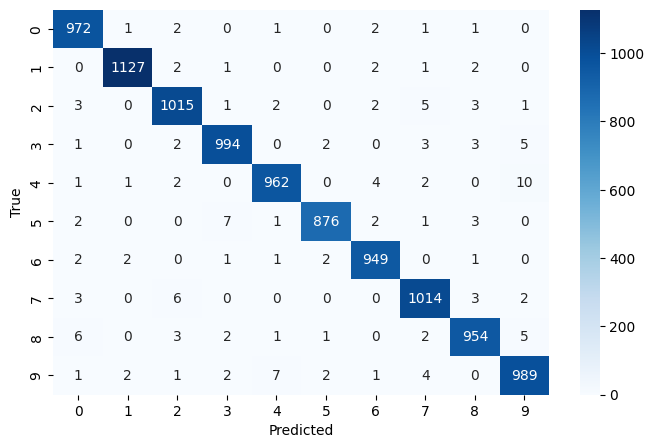

In [ ]:
import seaborn as sn
plt.figure(figsize=(8, 5))
sn.heatmap(confusion_matrix_3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

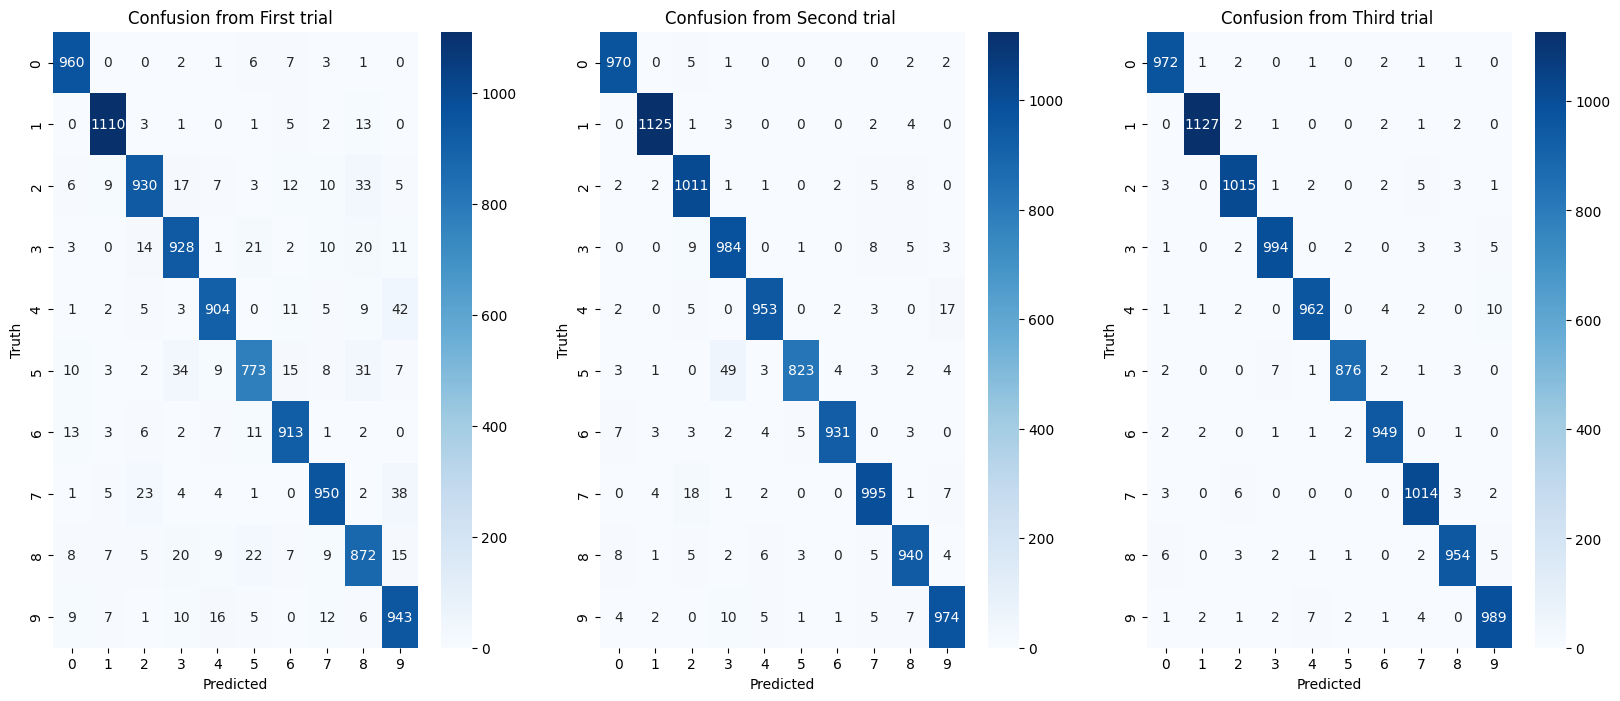

In [ ]:
# Draw three confusion matrix together to show the improvement
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

# First heatmap
sn.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion from First trial  ')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Truth')

# Second heatmap
sn.heatmap(confusion_matrix_2, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion from Second trial ')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Truth')

# Third heatmap
sn.heatmap(confusion_matrix_3, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Confusion from Third trial ')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Truth')

plt.show()

## Result

- The result improved after hyperparameter tuning
- Based on the outcomes of the three trials, it is evident that the third trial performed the best.